In [1]:
import h5py
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib notebook

# Data access

In [49]:
runnr = 100
base_path = '/Volumes/Duane1/amol3416/pbcv/'
filename_ol1 = base_path + 'amol3416_r%04d_ol1.h5' %runnr
filename_ol3 = base_path + 'amol3416_r%04d_ol3.h5' %runnr
filename_sizing = base_path + 'sizing/amol3416_r%04d_sizing.h5' %runnr

# Hit-finding

The overall hitrate for run 100 is 11.2%


<IPython.core.display.Javascript object>


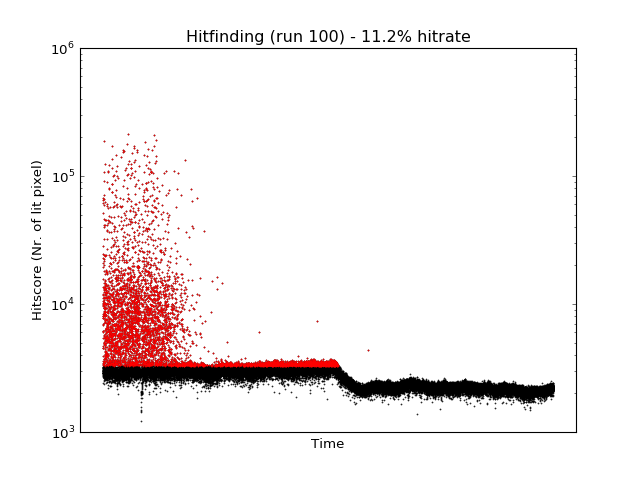

In [50]:
# Loading hitscore for output level 1 (all events)
with h5py.File(filename_ol1, 'r') as f:
    timestamp_all = f['entry_1/event/timestamp'][:]
    hitscore_all  = f['entry_1/result_1/hitscore_litpixel'][:]

# Loading hitscore for output level 3 (all hits)
with h5py.File(filename_ol3, 'r') as f:
    timestamp_hits = f['entry_1/event/timestamp'][:]
    hitscore_hits = f['entry_1/result_1/hitscore_litpixel'][:]
    hitscore_threshold = f['entry_1/result_1/hitscore_litpixel_threshold'][0]

# Time limits

    
# Calculate overall hitrate
hitrate = float(hitscore_hits.shape[0]) / hitscore_all.shape[0] * 100
print "The overall hitrate for run %d is %.1f%%" %(runnr, hitrate)
    
# Plotting hitscore and threshold
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.set_title('Hitfinding (run %d) - %.1f%% hitrate' %(runnr, hitrate))
ax.scatter(timestamp_all,  hitscore_all,  color='k', s=1, marker='.')
ax.scatter(timestamp_hits, hitscore_hits, color='r', s=1, marker='.')
ax.set_xticks([])
ax.set_xlabel('Time')
ax.set_ylabel('Hitscore (Nr. of lit pixel)')
ax.semilogy()
plt.show()